In [9]:
# Useful imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon, LineString, box
from environment import Environment, plot_environment, plot_line, plot_poly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Relevant examples for the RRT Problem Set

Find below relevant examples on how to use the `Environment` class and the `shapely` library for collision checking.

## Using the Environment class

The environment class is a simple class that represents the obstacles in the scene.

You can start an empty Environment class with no obstacles, and add them later as polygons:

(7.0, 5.5)


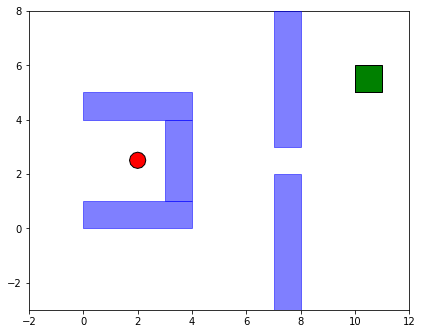

In [15]:
# Example that shows how to create an empty environment.
env = Environment(None)

# Each obstacle is a Polygon (shapely class)
# Each Polygon is defined by a list of its vertices
env.add_obstacles([Polygon([(0,0),(0,1),(4,1),(4,0)]),
                  Polygon([(0,4),(0,5),(4,5),(4,4)]),
                  Polygon([(3,1),(3,4),(4,4),(4,1)]),
                  Polygon([(7,3),(7,8),(8,8),(8,3)]),
                  Polygon([(7,-3),(7,2),(8,2),(8,-3)])
                  ])

# We can use the plot_environment function to plot the defined environment
# the bounds (minx,miny,maxx,maxy) specify the bounds that are plotted.
bounds = (-2, -3, 12, 8)
# The plot_environment function returns a matplotlib axes instance.
# This can be used to add more elements to the plot.
ax = plot_environment(env, bounds=bounds)


# In shapely, a point is defined with the Point class
start_point = Point((2,2.5))

# The point can be "buffered" by any amount (0.3) to create
# a polygonal approximation of a circle.
# The resolution parameter specifies how precise that approximation is.
start_ball = start_point.buffer(0.3, resolution=3)

# We can use the provided plot_poly function to plot polygons in the plot.
end_pose = Polygon([(10,5), (10,6), (11,6), (11,5)])
plot_poly(ax, start_ball,'red')
plot_poly(ax, end_pose,'green')

In [16]:
# If you like the environment you have defined, you can save it to a yaml file

env.save_to_yaml("test_environment.yaml") # Uncomment this line if you want to try the save function

(6.769230769230769, 5.5)


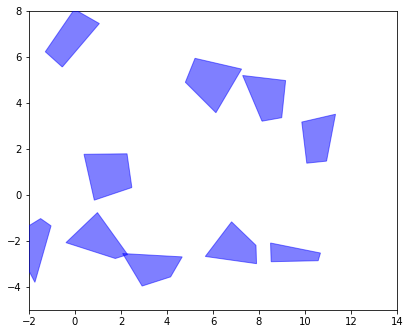

In [13]:
# You can also load environments from yaml files
# In this case "simple.yaml" is an example environment that we
# are giving you to test.
simple_env = Environment("simple.yaml")
bounds = (-2, -5, 14, 8)
# The bounds parameter is optional.
# If you don't specify it,
# the plot_environment will calculate the bounds on its own
plot_environment(simple_env, bounds=bounds)

# Collision checking

In order to implement RRT, you will need some collision checking procedure.

The following provides an example on how to use the `shapely` library to do collision checking, but you could implement any other collision checking algorithm.


Expanded line intersects obstacle 0?  False
Point (3.5, 1) inside obstacle 0?  False
Expanded line intersects obstacle 1?  True
Point (3.5, 1) inside obstacle 1?  True
(6.285714285714286, 5.5)


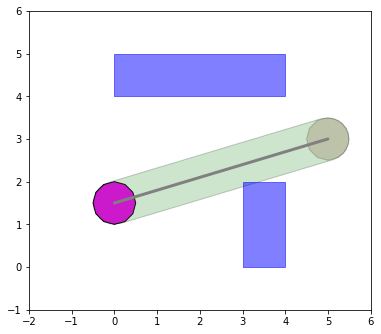

In [14]:
# Create an empty environment
env = Environment(None)
# Add some obstacles
env.add_obstacles([Polygon([(0,4),(0,5),(4,5),(4,4)]),
                  Polygon([(3,0), (3,2),(4,2),(4,0)])])

# Define the start and end poses
# and the radius of the ball
start = (0,1.5)
end = (5,3)
radius = 0.5
start_pose = Point(start).buffer(radius, resolution=3)
end_pose = Point(end).buffer(radius, resolution=3)

# Line that connects the start to the end
line = LineString([start, end])

# "Buffer" the line by the radius amount
# This expands the line and creates a polygonal approximation
# We can use this to test for collisions
expanded_line = line.buffer(0.5, resolution=3)

for i, obs in enumerate(env.obstacles):
    # Check collisions between the expanded line and each obstacle
    print("Expanded line intersects obstacle %d? " % i,expanded_line.intersects(obs))
    # Checks to see if a point is inside each obstacle
    print("Point (3.5, 1) inside obstacle %d? " % i,obs.contains(Point((3.5,1))))

# Draw the environment (with its obstacles)
ax = plot_environment(env, bounds=(-2,-1,6,6))
# Draw the start and end poses
plot_poly(ax, start_pose,'magenta')
plot_poly(ax, end_pose,'brown', alpha=0.2)
# Draw the original line
plot_line(ax, line)
# Draw the expanded line
plot_poly(ax, expanded_line, 'green', alpha=0.2)